# Analyzing the Auto data set with Mulitple Linear Regression

We are trying to demonstrate how to use R to carry out linear regression analysis on real-world datasets. 

The first question is about applying multiple linear regression to analyzing the **Auto** dataset. You are going to 
* explore the correlation between variables

* Build a multiple linear regression with mpg as the response variable，learn to interpret the output of the `lm()` function using the `summary()` function.

* use the plot() function to produce diagnostic plots, e.g., residual plot and QQ plot.

* explore possible interaction between variables

* study how different variable transformations will affect the model.

## Preparation
### Data Importing

In [1]:
# install ISLR library
install.packages('ISLR')

# import package
library(ISLR)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### check missing values

In [2]:
# The na.omit R function removes all incomplete cases of a data object (typically of a data frame, matrix or vector)
Auto = na.omit(Auto) 
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


### Drop values

Assume that we are not interested in 'name', 'name' is actually a categorical variable, delete the columns that you don't want. 

In [4]:
Auto$name = NULL
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1
15,8,429,198,4341,10.0,70,1


### Review the Data Set Structure

using the `str()` function to check data structure, include 
* the data type of each column
* the total number of observations(rows)
* the total number of variables(columns)

In [6]:
str(Auto)

'data.frame':	392 obs. of  8 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...


## Exploring Data 

### 1. 相关性分析

**Scatterplot matrix 散点图分析相关性**

Using the `pairs()` to produce a scatterplot matrix which includes all of the variables in the data set

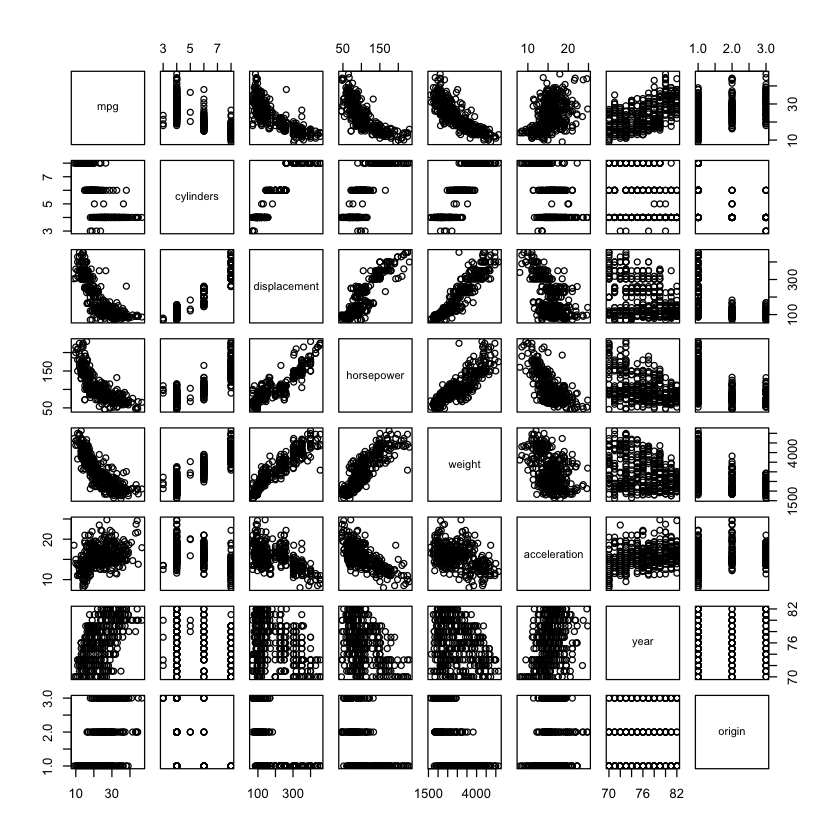

In [7]:
pairs(Auto) 

> Correlated:
> * Horsepower and weight are highly correlated.
> * Displacement and weight are highly correlated.

**Correlations Matrix Analysis 相关系数矩阵分析**

Compute the matrix of correlations between the variables using the function `cor()` . This matrix prints out the numerical values for the correlation. It presents the same info as the pair plot but in numerical form.


In [8]:
cor(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


`levelplot()` heatmap analysis 

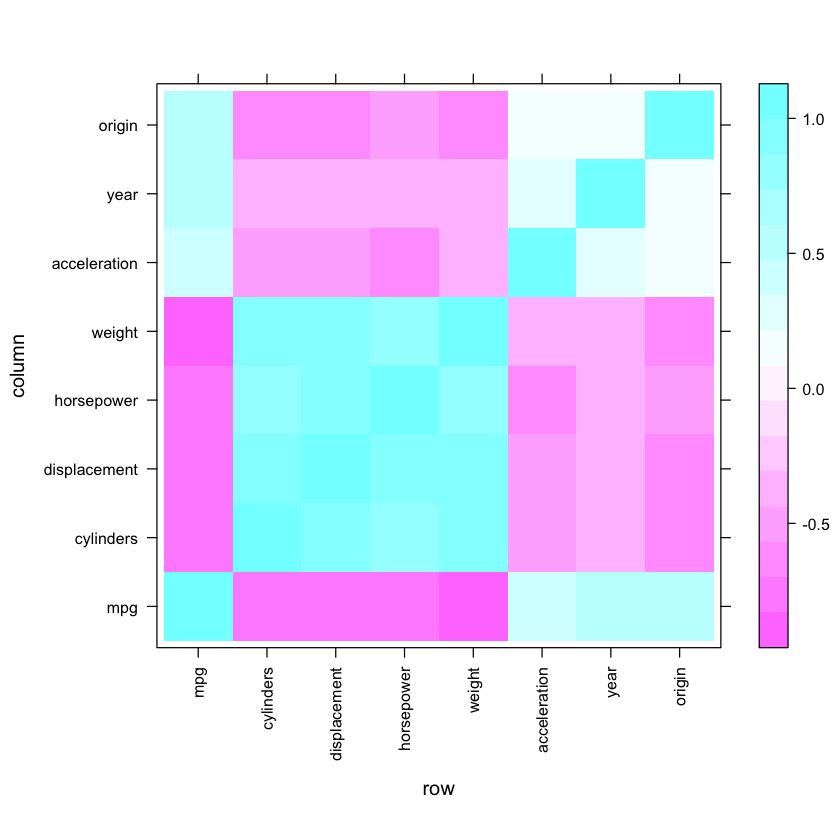

In [9]:
library(lattice)                                            # Load the library
levelplot(cor(Auto), scales = list(x = list(rot = 90)))     # plot it flipping the axis

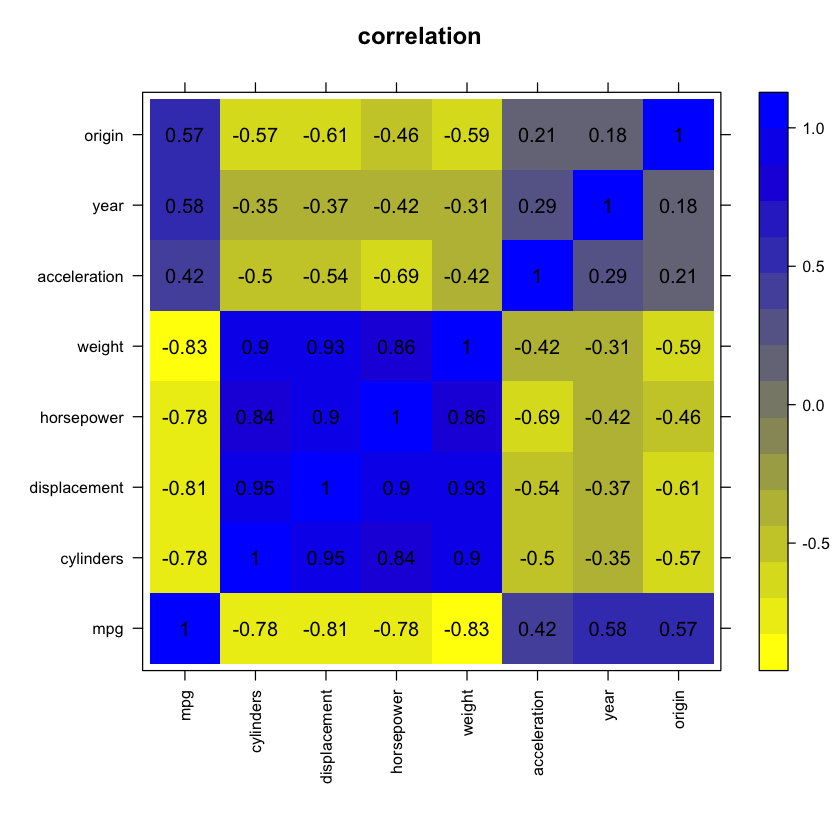

In [14]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("yellow","blue"))
#Plot the correlation matrix.
levelplot(cor(Auto), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

### 2. 拟合模型

* Use the `lm()`function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

* Use the `summary()` function to print the results. 

In [17]:
my_fit = lm(mpg~., data = Auto)  # mpg: response variable;  others: predictors
summary(my_fit)


Call:
lm(formula = mpg ~ ., data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


> **i. Is there a relationship between the predictors and the response?**
>
> There are multiple predictors that have a relationship with the response because their associated p-value is significant. The p-value tells us the probability that the coefficient will take a value of 0. The typical threshold for p-value is 0.05. If the probability is below 0.05, then that means chances that it will be 0 is very slim.
> 
> **ii. Which predictors appear to have a statistically significant relationship to the response?**
>
> The predictors: displacement, weight, year, and origin have a statistically significant relationship.

In [7]:
# Remove variabance 'horsepower' and 'acceleration' to rebuild model
summary(lm(mpg~., data = subset(Auto, select=c( -horsepower, -acceleration ))))


Call:
lm(formula = mpg ~ ., data = subset(Auto, select = c(-horsepower, 
    -acceleration)))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0622  -2.0922  -0.0593   1.8165  13.2758 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.781e+01  4.070e+00  -4.375 1.57e-05 ***
cylinders    -4.240e-01  3.221e-01  -1.316   0.1889    
displacement  1.176e-02  6.685e-03   1.759   0.0793 .  
weight       -6.506e-03  5.591e-04 -11.637  < 2e-16 ***
year          7.724e-01  4.977e-02  15.518  < 2e-16 ***
origin        1.250e+00  2.673e-01   4.676 4.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.343 on 386 degrees of freedom
Multiple R-squared:  0.8189,	Adjusted R-squared:  0.8166 
F-statistic: 349.1 on 5 and 386 DF,  p-value: < 2.2e-16


### 3. diagnostic plots 诊断分析图
诊断图主要是用来评估异方差性、正态性和对结果有影响的异常观测值。


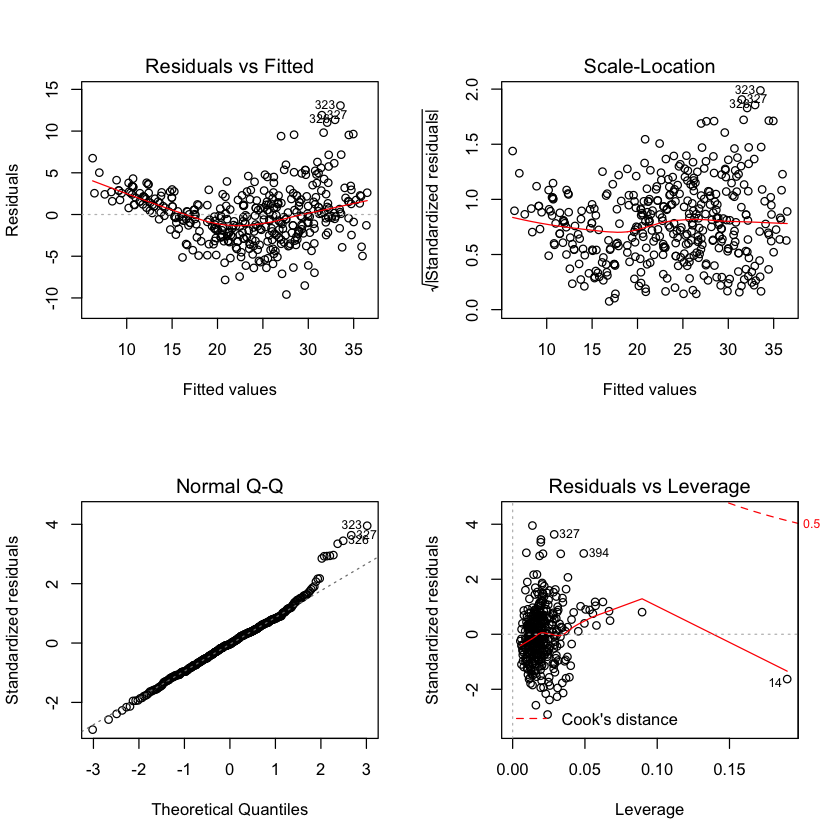

In [18]:
par(mfcol=c(2,2)) # 创建2行2列的画布
plot(my_fit) # 绘制析因设计结果的诊断图

```
Non-Linearity: 
The residual plot shows that there is a U-shape pattern in the residuals which might indicate that the data is non-linear.

Non-Constant Variance: 
The residual plot also shows that the variance is not constant. There is a funnel shape appearing at the end. The spread of residuals starts off small but then increases. This is an example of heteroscedasticity (non-constant variance)

Normal Distributed Residuals: Based on the Normal Q-Q Plot, we can determine if the residuals are normally distributed. The residuals are normally distributed if the observations line up on the dashed line. In this case the a handful of the observations does not lie on the line especially for 323, 327, 326.

Outliers: 
The Scale-Location plot displays if there are outliers in the data. The data will be an outlier if standardized residual is outside the range of [-3, 3]. Based on this graph, there don’t seem to be any outliers because all values are within the range of [0,2].

High Leverage Points: 
The Residuals vs Leverage plot shows observations that have high leverage points. The Cook’s distance is shown with the dashed red line. Points that are above the Cook’s distance are high leverage points. Based on the Residuals vs. Leverage graph, there are no observations that provide a high leverage.
```

### 4. Interaction effects.
Use the `*`and `:`symbols to fit linear regression models with interaction effects.  If one predictor affects another predictor, then this is called interaction effect. To implement an interaction effect in our model, we just multiply the two predictors to create a new term, the interaction term.

In [8]:
# adding an interaction term horsepower * displacement
summary(update(my_fit, . ~ . + horsepower:weight))


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + year + origin + horsepower:weight, data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-8.589 -1.617 -0.184  1.541 12.001 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.876e+00  4.511e+00   0.638 0.524147    
cylinders         -2.955e-02  2.881e-01  -0.103 0.918363    
displacement       5.950e-03  6.750e-03   0.881 0.378610    
horsepower        -2.313e-01  2.363e-02  -9.791  < 2e-16 ***
weight            -1.121e-02  7.285e-04 -15.393  < 2e-16 ***
acceleration      -9.019e-02  8.855e-02  -1.019 0.309081    
year               7.695e-01  4.494e-02  17.124  < 2e-16 ***
origin             8.344e-01  2.513e-01   3.320 0.000986 ***
horsepower:weight  5.529e-05  5.227e-06  10.577  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.931 on 383 degrees of freedom
Multiple R-squared:  0.

### 5. `anova()` 评估模型效应

We can also use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/anova.lm.html">anova()</a> function to compare models. Note that the <font color="blue">anova()</font> function has one strong requirement when comparing two models: 0one model must be contained within the other</font>. In other words, all the terms of the smaller model must appear in the larger model. Otherwise, the comparison is impossible.

在R中，我们可以使用函数anova(fit1, fit2)去评估不同模型的效应

In [12]:
anova(my_fit, update(my_fit, . ~ . + horsepower:weight))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
384,4252.213,NA,NA,NA,NA
383,3290.884,1,961.3283,111.8814,4.11858e-23


The p-value shows that the two models are statistically different as The p-value is very low. It means that adding the interaction term does make a difference.

Try the following script, which transforms <font color="orange"> horsepower</font>

In [9]:
summary(update(my_fit, . ~ . - horsepower + log(horsepower)))


Call:
lm(formula = mpg ~ cylinders + displacement + weight + acceleration + 
    year + origin + log(horsepower), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3115 -2.0041 -0.1726  1.8393 12.6579 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     27.254005   8.589614   3.173  0.00163 ** 
cylinders       -0.486206   0.306692  -1.585  0.11372    
displacement     0.019456   0.006876   2.830  0.00491 ** 
weight          -0.004266   0.000694  -6.148 1.97e-09 ***
acceleration    -0.292088   0.103804  -2.814  0.00515 ** 
year             0.705329   0.048456  14.556  < 2e-16 ***
origin           1.482435   0.259347   5.716 2.19e-08 ***
log(horsepower) -9.506436   1.539619  -6.175 1.69e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.18 on 384 degrees of freedom
Multiple R-squared:  0.837,	Adjusted R-squared:  0.834 
F-statistic: 281.6 on 7 and 384 DF,  p-value: < 2.2e-16
